In [1]:
# packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# read data
read = pd.read_csv('sta141c_airlines_delay.csv', header = 0) 

In [3]:
# drop rows with na values and reset the index
df=read.dropna().reset_index(drop=True)
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313,1296,141,DL,ATL,HOU,1,0
1,6948,360,146,OO,COS,ORD,4,0
2,1247,1170,143,B6,BOS,CLT,3,0
3,31,1410,344,US,OGG,PHX,6,0
4,563,692,98,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973,530,72,OO,GEG,SEA,5,1
539378,1264,560,115,WN,LAS,DEN,4,1
539379,5209,827,74,EV,CAE,ATL,2,1
539380,607,715,65,WN,BWI,BUF,4,1


In [4]:
# data types of each column
df.dtypes

Flight          int64
Time            int64
Length          int64
Airline        object
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Class           int64
dtype: object

In order to linear regression on this dataset, the dataset most fulfill a set of assumptions.
The dependent variable must be a binary variable: The class variable is our dependent variable, and it is binary. In addition, there must be a significant amount of samples in the dataset. This dataset gas 539381 samples, so it is enough. Finally, all of the predictor variables need to present little to no multicollinearity. We can confirm this using the VIF score procedure.

In [5]:
# unique Airline column values
AirlineUnique = df.Airline.unique()
AirlineUnique

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [6]:
# unique AirportFrom column values
AirportFromUnique = df.AirportFrom.unique()
AirportFromUnique

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

In [7]:
# unique AirportTo column values
AirportToUnique = df.AirportFrom.unique()
AirportToUnique

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

In [8]:
# returns how many unique values there are for Airline column
lenAirlineUnique = len(df.Airline.unique())
lenAirlineUnique

18

In [9]:
# returns how many unique values there are for AirportFrom column
lenAirportFromUnique = len(df.AirportFrom.unique())
lenAirportFromUnique

293

In [10]:
# returns how many unique values there are for AirportTo column
lenAirportToUnique = len(df.AirportTo.unique())
lenAirportToUnique

293

In [11]:
# adds a column to df that has numerical values associated with the corresponding Airline column
Airlinelst = list(range(0,lenAirlineUnique))
df['NumAirline'] = df['Airline']
df['NumAirline'].replace(AirlineUnique, Airlinelst , inplace=True)  

In [12]:
# adds a column to df that has numerical values associated with the corresponding AirportFrom column
AirportFromlst = list(range(0,lenAirportFromUnique))
df['NumAirportFrom'] = df['AirportFrom']
df['NumAirportFrom'].replace(AirportFromUnique, AirportFromlst , inplace=True) 

In [13]:
# adds a column to df that has numerical values associated with the corresponding AirportTo column
AirportTolst = list(range(0,lenAirportToUnique))
df['NumAirportTo'] = df['AirportTo']
df['NumAirportTo'].replace(AirportToUnique, AirportTolst , inplace=True) 

In [14]:
# updated df
df 

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,NumAirline,NumAirportFrom,NumAirportTo
0,2313,1296,141,DL,ATL,HOU,1,0,0,0,144
1,6948,360,146,OO,COS,ORD,4,0,1,1,30
2,1247,1170,143,B6,BOS,CLT,3,0,2,2,12
3,31,1410,344,US,OGG,PHX,6,0,3,3,26
4,563,692,98,FL,BMI,ATL,4,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...
539377,6973,530,72,OO,GEG,SEA,5,1,1,96,47
539378,1264,560,115,WN,LAS,DEN,4,1,5,49,43
539379,5209,827,74,EV,CAE,ATL,2,1,9,74,0
539380,607,715,65,WN,BWI,BUF,4,1,5,8,45


In [15]:
# prints VIF results for predictor variables. Hoping for VIF results less than 5
x = df[['Flight','Time','Length','NumAirline', 'NumAirportFrom','NumAirportTo','DayOfWeek']]  
x
vif = pd.DataFrame()    
vif["feature"] = df[['Flight','Time','Length','NumAirline', 'NumAirportFrom','NumAirportTo','DayOfWeek']].columns 
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
print(vif)

          feature       VIF
0          Flight  2.475941
1            Time  6.362384
2          Length  3.766995
3      NumAirline  2.682671
4  NumAirportFrom  2.011699
5    NumAirportTo  2.147090
6       DayOfWeek  4.433084


Based on our VIF results, Flight, Length, Airline, AirportFrom, AirportTo, and DayOfWeek have a small amount of multicollinearity. However, it is not singificant enough to worry about. One variable we should pay attention to is Time, as it has a VIF of 6.362, making it the highest in the dataset. This variable could be a problem when it comes to performing logistic regression. However, the rest of the variables are independent from each other, making it safe to proceed with logistic regression. 

In [16]:
# tests and trains logistic regression model using independent and dependent variables
x = df[['Flight','Length','NumAirline', 'NumAirportFrom','NumAirportTo','DayOfWeek']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x,y , train_size=0.8, shuffle=True)
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
# prints model prediction accuracy
modelPred = model.score(X_test, y_test)
print(f'Prediction accuracy of model: {modelPred}')

Prediction accuracy of model: 0.5598134912910073


[Text(0, 0.5, 'Failure'), Text(0, 1.5, 'Success')]

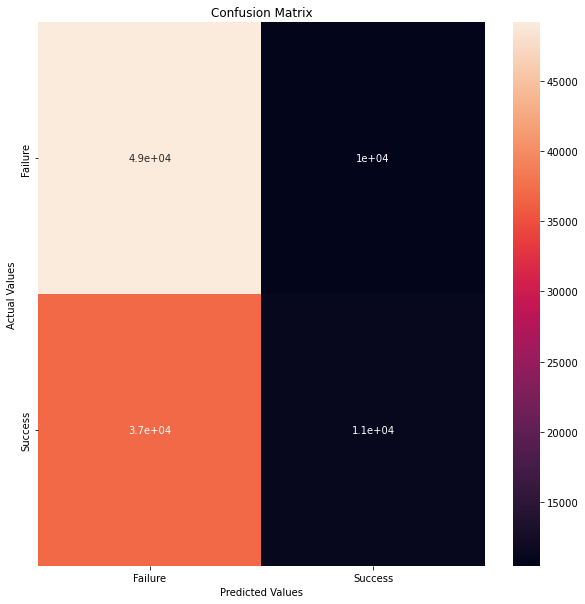

In [17]:
# confusion matrix heat map
plot = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, plot)
plt.figure(figsize = (10,10))
plot = sn.heatmap(confusionMatrix, annot = True)
# confusion matrix heat map labeling
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values') 
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Failure', 'Success'])
plot.yaxis.set_ticklabels(['Failure', 'Success'])


This model generates a high number of true negatives. However, it also generates a high number of false negatives. Both true positives and false negatives occur an equal and significant amount of times as well.

Overall, our model is not too accurate and could be improved on.